In [1]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
'''
@File    :   MathZXB.py
@Time    :   2020/04/27 09:52:06
@Author  :   DataMagician 
@Version :   1.0
@License :   DataMagician
@Desc    :   None
'''

# here put the import lib
import numpy as np
import math
from scipy import stats as sst
import os
from math import log

def longerror(func):
    def In(*vars):
        try :
            return func(*vars),
        except Exception as e :
            __import__('cgitb').enable ( format = 'text' )
        return func (*vars),
    return In

def check(func):
    def In(*data):
        try:
            return func(*data)
        except Exception :
            return func(*data),
    return In


class stats:

    def __init__(self):
        pass


    @longerror
    @check
    def dim2_to_dim1(self,data)->iter:
        '''
        二维降一维
        :param data:
        :return:
        '''
        return [j for i in range(len(data)) for j in data[i]]

    def spread(self,arg):
        '''
        广播函数
        :param arg:
        :return:
        '''
        resultsp = []
        for i in arg:
            if isinstance(i, (list,tuple)):
                resultsp.extend(i)
            else:
                resultsp.append(i)
        return resultsp

    @longerror
    @check
    def deep_flatten(self,ls)->list:
        '''
        深度平展
        :param lst:
        :return:
        '''
        result = []
        result.extend(self.spread(list(map(lambda x: self.deep_flatten(x) if type(x) in (list,tuple) else x, ls))))
        return result


    @longerror
    @check
    def avg(self,vector):
        m = vector.shape[0]
        return np.dot(vector,np.ones(m))/m

    @longerror
    @check
    def quadraticsum(self,vector):
        return np.dot(vector,vector.T)

    @longerror
    @check
    def samplevar(self,vector):
        m = vector.shape
        cur = (vector-self.avg(vector))
        return np.dot(cur,cur.T)/(m[0]-1)

    @longerror
    @check
    def populationvar(self,vector):
        m = vector.shape
        cur = (vector-self.avg(vector))
        return np.dot(cur,cur.T)/m[0]


    @longerror
    @check
    def samplestd(self,vector):
        return np.sqrt(self.samplevar(vector))

    @longerror
    @check
    def populationstd(self,vector):
        return np.sqrt(self.populationvar(vector))

    @longerror
    @check
    def cov(self,vector1,vector2):
        m = vector1.shape[0]
        return np.dot((vector1-self.avg(vector1)),(vector2-self.avg(vector2)))/(m-1)

    @longerror
    @check
    def coe(self,vector):
        return self.populationstd(vector)/self.avg(vector)

    @longerror
    @check
    def zscore(self,vector):
        return (vector-self.avg(vector))/self.populationstd(vector)

    @longerror
    @check
    def pearson(self,vector1,vector2):
        n = vector1.shape[0]
        sum_arr1 , sum_arr2 = vector1.sum() , vector2.sum()
        sum_pow_arr1,sum_pow_arr2 = np.dot(vector1,vector1) , np.dot(vector2,vector2)
        p_sum_arr = np.dot(vector1,vector2)
        cov = p_sum_arr-(sum_arr1*sum_arr2/n)
        std = np.sqrt((sum_pow_arr1 - (sum_arr1** 2) / n) * (sum_pow_arr2 - (sum_arr2** 2) / n))
        return cov/std

    @longerror
    @check
    def MSE(self,yhat,y):
        '''
        残差平方和
        :param yhat:
        :param y:
        :return:
        '''
        return np.dot(yhat-self.avg(y),yhat-self.avg(y))

    @longerror
    @check
    def EquationRegression(self,X,Y,predict):
        '''
        回归方程
        :param X:
        :param Y:
        :param predict:
        :return:
        '''
        try:
            xm,xn = X.shape
            ym,yn = Y.shape
        except Exception:
            xm,xn = X.shape
            Y = Y[:,None]
        finally:
            newX = np.c_[np.ones(xm),X]
            fit = np.dot(np.dot(np.linalg.inv(np.dot(newX.T,newX)),newX.T),Y)
            predictX = np.dot(np.r_[np.ones(1),np.array(predict)],fit)
            return fit,predictX

    @longerror
    @check
    def pearsonMove(self,vector1,vector2,alpha):
        '''
        滑动皮尔逊系数范围
        :param vector1:
        :param vector2:
        :param alpha:
        :return:
        '''
        n1,n2 = vector1.shape[0] , vector2.shape[0]
        return np.array([self.pearson(vector1[:i+alpha],vector2[:i+alpha]) for i in range(n1//alpha)])

    @longerror
    @check
    def personConstand(self,vector1,vector2,alpha):
        '''
        定长滑动皮尔逊系数
        :param vector1:
        :param vector2:
        :param alpha:
        :return:
        '''
        n1,n2 = vector1.shape[0] , vector2.shape[0]
        return np.array([self.pearson(vector1[:i+alpha],vector2[:i+alpha]) for i in range(0,n1//alpha)])

    @longerror
    @check
    def personMat(self,vector):
        '''
        皮尔逊矩阵
        :param vector:
        :return:
        '''
        mean = np.mean(vector,axis=0)
        std = np.std(vector,axis=0)
        zscore = (vector-mean)/std
        return  np.corrcoef(zscore)

    @longerror
    @check
    def P(self,SET,symbols,A):
        m = SET.shape[0]
        return np.dot(eval('SET'+symbols+'A').astype(int),np.ones(m))/m

    @longerror
    @check
    def PInverse(self,SET,symbols,A):
        '''
        反概率
        :param SET:
        :param A:
        :return:
        '''
        return (1-self.P(SET,symbols,A)[0])

    @longerror
    @check
    def PUnin(self,SETList,symblos,eventList):
        '''
        有BUG，要该，数据格式为numpy
        联合事件概率计算
        :param SETList:
        :param eventList:
        :return:
        '''
        if len(SETList)==len(eventList):
            step1 = np.array([self.P(sets,symblos,even) for sets , even in zip(SETList,eventList)])
            return np.cumprod(step1)[-1:]
        else:
            return np.nan

    @longerror
    @check
    def PUninInverse(self,SETList,symbols,eventList):
        '''
        联合事件的反的概率
        :param SETList:
        :param symbols:
        :param eventList:
        :return:
        '''
        return 1-self.PUnin(SETList,symbols,eventList)[0]

    @longerror
    @check
    def PIndependentUnin(self,SETAList,symbols,eventList):
        '''
        相互独立且互斥事件的联合事件发生概率
        :param SETAList:
        :param symbols:
        :param eventList:
        :return:
        '''
        if len(SETAList)==len(eventList):
            m = len(SETAList)
            step = np.array([self.P(sets,symbols,even) for sets , even in zip(SETAList,eventList)])
            return np.dot(step.T,np.ones((m)))
        else:
            return np.nan

    @longerror
    @check
    def PIndependentUninsInverse(self,SETList,symbols,eventList):
        '''
        相互独立且互斥事件的联合事件概率的反概率
        :param SETList:
        :param symbols:
        :param eventList:
        :return:
        '''
        m = len(SETList)
        return m-self.PIndependentUnin(SETList,symbols,eventList)

    @longerror
    @check
    def PIndependentUninsSameTime(self,SETList,symbols,eventList):
        '''
        如果相互独立的事件不是互斥的，则联合概率的反概率为
        :param SETList:
        :param symbols:
        :param eventList:
        :return:
        '''
        return self.PIndependentUnin(SETList,symbols,eventList)-self.PUnin(SETList,symbols,eventList)

    @longerror
    @check
    def PAandB(self,SETA,SETB,A,B,symbols):
        '''
        条件概率
        :param SETA:
        :param SETB:
        :param A:
        :param B:
        :return:
        '''
        return self.PUnin([SETA,SETB],symbols,[A,B])[0]/self.P(SETB,symbols,A)[0]
        
    @longerror
    @check
    def L2(self,theta):
        try:
            theta.shape[-1]
            return np.dot((theta*theta).T,np.ones(theta.shape[0]))
        except Exception:
            return np.dot((theta*theta),np.ones(theta.shape[0]))
    
    def L1(loss,theta):
    	n = theta.shape[0]
    	return loss+np.abs(np.dot(theta,np.ones(n)))

    @longerror
    @check
    def sigmoid(self,z):
        '''
        逻辑曲线
        :param z:
        :return:
        '''
        return 1/(1+np.exp(-z))

    @longerror
    @check
    def frequency(self,data)->list:
        '''
        基础频率分析
        :param data:
        :return:
        '''
        dropdata = self.deep_flatten(data)
        setdata = tuple(set(dropdata))
        vector = np.array([setdata.index(i) for i in dropdata])
        logistic = set(self.sigmoid(vector))
        name =  np.array(['name','p','sigmoid','count'])
        unin = np.array([(i,dropdata.count(i)/len(data),l,dropdata.count(i)) for i,l in zip(setdata,logistic)])
        return {'unin':[name,unin],'element':setdata,'count':len(dropdata)}

    @longerror
    @check
    def compare(self,Asrc,Bsrc)->list:
        '''
        双向量比较
        :param Asrc:
        :param Bsrc:
        :return:
        '''
        Asrc,Bsrc = self.deep_flatten(Asrc),self.deep_flatten(Bsrc)
        drop = lambda data:[j for i in range(len(data)) for j in data[i]]
        A,B = drop(Asrc),drop(Bsrc)
        Am ,Bm = len(A),len(B)
        thesame = [[(A[An],An,Bn)for Bn in range(Bm) if  A[An]==B[Bn]] for An in range(Am)]
        different = [[(A[An],An,Bn)for Bn in range(Bm) if  A[An]!=B[Bn]] for An in range(Am)]
        return {'different':drop(sorted(different)),'thesame':drop(sorted(thesame))}

    @longerror
    @check
    def entropyPx(self,X,symbol,x,In='bit'):
        '''信息熵H(X)=−∑_{x∈χ}p(x)logp(x)'''
        n = X.shape[0]
        px = np.dot(np.array(eval('X'+symbol+'x')).astype(int)/n,np.ones(n))
        if px == 0 :
            return px*0
        if px == 1:
            return 0
        else:
            if In == 'bit':
                return -px * math.log(px,2)
            elif In == 'nat':
                return -px * math.log(px,math.e)

    @longerror
    @check
    def entropyPX(self,X,symbol='==',In='bit'):
        '''信息熵H(X)'''
        n = X.shape[0]
        PXi= np.array([self.entropyPx(X,symbol,x,In) for x in X])
        PX = np.dot(PXi,np.ones(n).T)
        return {'entropy':PX,'probability':{x:p for x,p in zip(X,PXi)}}

    @longerror
    @check
    def cal_entropy(self,data)->list:
        '''
        信息熵计算
        :param data:
        :return:
        '''
        ltries = len(data)
        labelcounts = {}
        for feat in data:
            label = feat[-1]
            if label not in labelcounts.keys():
                labelcounts[label] = 0
            labelcounts[label] += 1
        entropy = 0.0
        for key in labelcounts.keys():
            p_i = float(labelcounts[key]/ltries)
            entropy -= p_i * log(p_i,2)
        return entropy

    @longerror
    @check
    def bayesTestPABcount(self, SETA, SETB, symbolsA, symbolsB, A, B):
        '''
        贝叶斯推断统计 ：
        :param SETA: 集合A
        :param SETB: 集合B
        :param symbolsA: 集合A中事件A的判断符号
        :param symbolsB: 集合B中事件B的判断符号
        :param A: 事件A
        :param B: 事件B
        :return: 事件B为真时A的概率
        '''
        PB = self.P(SETB, symbolsB, B)[0]
        if PB > 0:
            PA = self.P(SETA, symbolsA, A)[0]
            PAB = PB * PA
            return np.array([(PAB * PA) / PB])
        else:
            return np.nan

    def BayesianInferenceA(self,PAdotB,PA,PB):
        '''
        贝叶斯推断例子:(学历一本以上且智商超过125的概率 * 智商超过125的概率） / 一本以上学历的概率 == 智商超过125的概率
        :param PAdotB:
        :param PA:
        :param PB:
        :return: 
        '''
        return PAdotB*PA/PB

    @longerror
    @check
    def BayesianInference(self, prior, PA, PB):
        '''
        贝叶斯更新
        :param prior: 先验概率
        :param PA: 更新概率，为先验概率中的真子集概率
        :param PB: 更新概率，为先验概率中假子集的真子集概率
        :return: (后验概率 , 贝叶斯因子)
        '''
        inverseOfPrior = 1 - prior
        bayesFactor = PA / PB
        return (prior / inverseOfPrior) * bayesFactor, bayesFactor

 
    def factorial(self,N):
        '''
        阶乘
        '''
        n = 1
        for i in range(1,N+1):
            n *= i
        return n


    def Ank(self,n,k):
        '''
        排列
        '''
        return factorial(n)/factorial(n-k)


    def Cnk(self,n,k):
        '''
        组合
        '''
        return self.factorial(n)/(self.factorial(k)*self.factorial(n-k))


    def bernoulliDistribution(self,n,X,P):
        '''
        伯努利分布
        '''
        k = X
        return self.Cnk(n,k)*(P**k)*((1-P)**(n-k))


    def Epb(self,n,k,P):
        '''
        二项分布的期望
        '''
        return 1/self.bernoulliDistribution(n,k,P)


    def pocssonDistribution(self,n,k,p):
        '''
        柏松分布计算
        '''
        Lambda = n*p
        probability = np.array([(np.exp(-Lambda)*Lambda**ki)/np.math.factorial(ki) for ki in range(k+1)])
        cumulativeProbability = np.array([np.dot(probability[:i],np.ones(i)) for i in range(1,len(probability)+1)])
        return probability[:-1],cumulativeProbability[:-1],Lambda


    def pocssonDistribution_to_table(self,n,k,p):
        '''
        柏松分布计算表
        '''
        probability,cumulativeProbability,Lambda = self.pocssonDistribution(n,k,p)
        return pd.DataFrame({'k':range(1,len(probability)+1),'Lambda':Lambda,'单次概率':probability,'累计概率':cumulativeProbability})
    

    def logistic_model_fitting(self,data):
        '''
        a为速度
        b数量的极大值
        c预期最终总数
        x是作图的x轴值
        y是作图的y轴值
        logisticNumber 是拟合的logistic曲线
        fit[1]是协方差矩阵
        endNumber是修正后的最终值
        endTime最终周期预测长度
        '''
        data = [i for i in data ]
        from scipy.optimize import curve_fit,fsolve
        len_ = len(data)
        x = list(range(len_))
        y = list(data)
        funtion = lambda a,b,c,x : c/(1+np.exp(-(x-b)/a))
        fit = curve_fit(logistic_model,x,y,p0=[2,100,200000])
        a,b,c= tuple(fit[0])
        logisticNumber = funtion(a,b,c,x)
        endNumber = c-fit[1][-1]
        endTime = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))
        return (a,b,c,x,y,fit[1],logisticNumber,endNumber,endTime)
    
    
   
    def logistic_model_plot(self,data):
        a,b,c,x,y,fit1,logistic_number,logisticNumber,endNumber,endTime = self.logistic_model1(data)
        plt.figure(figsize=(10,8))
        plt.scatter(x,y,c='g')
        plt.plot(logistic_number,c='r')
        plt.scatter(endTime,endNumber,'b')
        plt.show()
        plt.close()


    def __del__(self):
        print("{}{}".format(stats.__name__,"is over"))


In [2]:
import pandas as pd
data1 = np.array([-5.95603333,-13.74569025,3.61276799,-12.89640616,-10.84291874,2.54103802 ,-2.63771395,8.85098071,11.40661881,1.92270348])
data2 = np.array([ -1.06859078,16.77300125,5.58709295,-1.67117327,-12.03275168,-7.4273895, -2.31151139,-0.48722528 ,10.83024766 ,22.06033399])
x = np.c_[data1,data2]
xdim1 = data1
y= np.random.randn(10)
s= stats()
print(s.PAandB(xdim1,y,5,5,'<'))
print(data1,data2)
print(s.EquationRegression(x,y,[2,16]))
print(s.bernoulliDistribution(10,5,0.5))
print(s.Epb(n=10,k=5,P=0.5))
table = s.pocssonDistribution_to_table(100,20,0.1)
print(table)

(array([0.8]),)
[ -5.95603333 -13.74569025   3.61276799 -12.89640616 -10.84291874
   2.54103802  -2.63771395   8.85098071  11.40661881   1.92270348] [ -1.06859078  16.77300125   5.58709295  -1.67117327 -12.03275168
  -7.4273895   -2.31151139  -0.48722528  10.83024766  22.06033399]
((array([[-0.24497161],
       [-0.00626064],
       [ 0.00758381]]), array([-0.13615188])),)
0.24609375
4.063492063492063
    Lambda   k      单次概率      累计概率
0     10.0   1  0.000045  0.000045
1     10.0   2  0.000454  0.000499
2     10.0   3  0.002270  0.002769
3     10.0   4  0.007567  0.010336
4     10.0   5  0.018917  0.029253
5     10.0   6  0.037833  0.067086
6     10.0   7  0.063055  0.130141
7     10.0   8  0.090079  0.220221
8     10.0   9  0.112599  0.332820
9     10.0  10  0.125110  0.457930
10    10.0  11  0.125110  0.583040
11    10.0  12  0.113736  0.696776
12    10.0  13  0.094780  0.791556
13    10.0  14  0.072908  0.864464
14    10.0  15  0.052077  0.916542
15    10.0  16  0.034718  0.951260


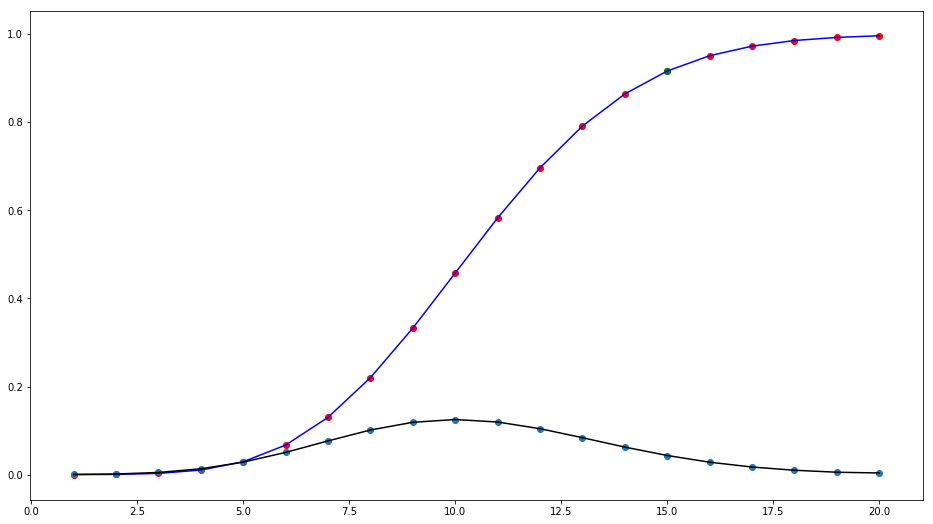

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(table.k,table.累计概率,c='b')
plt.scatter(table.k,table.累计概率,c='r')
plt.scatter(table.k[14:15],table.累计概率[14:15],c='g')
plt.scatter(range(1,21),np.gradient(table.累计概率))
plt.plot(range(1,21),np.gradient(table.累计概率),c='k')
plt.show()
plt.close()

In [4]:
np.gradient(table.累计概率)

array([0.000454  , 0.001362  , 0.00491833, 0.01324165, 0.02837496,
       0.05044437, 0.07656734, 0.10133913, 0.11885453, 0.12511004,
       0.11942322, 0.10425836, 0.08384414, 0.06249253, 0.04339759,
       0.02820843, 0.01723139, 0.00992755, 0.00541164, 0.00373216])